In [1]:
pip install cartopy cmocean

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotting_functions_dataset as pf
import xarray as xr
import cmocean

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [3]:
clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_20180101-20180101_tos.zarr"
ds = xr.open_dataset(clf,engine='zarr')

In [4]:
min_lonGS = -82
min_latGS = 25
max_lonGS = -50
max_latGS = 43

In [5]:
mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)

dsGS = ds.where(mask_lon & mask_lat, drop=True)

In [6]:
dsGS

<xarray.Dataset> Size: 853MB
Dimensions:               (time_counter: 24, axis_nbounds: 2, y: 843, x: 1160)
Coordinates:
    nav_lat               (y, x) float32 4MB 25.01 25.01 25.01 ... 44.04 44.04
    nav_lon               (y, x) float32 4MB -81.97 -81.94 ... -50.09 -50.06
    time_centered         (time_counter) datetime64[ns] 192B ...
  * time_counter          (time_counter) datetime64[ns] 192B 2018-01-01T00:30...
Dimensions without coordinates: axis_nbounds, y, x
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds, y, x) datetime64[ns] 376MB ...
    time_counter_bounds   (time_counter, axis_nbounds, y, x) datetime64[ns] 376MB ...
    tos                   (time_counter, y, x) float32 94MB 23.16 23.18 ... nan
Attributes: (12/14)
    Conventions:  CF-1.8
    NCO:          netCDF Operators version 5.1.9 (Homepage = http://nco.sf.ne...
    area:         Global
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    description:  ocean T grid variables
    ...           ...
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    references:   http://marine.copernicus.eu
    source:       MOI ORCA36
    title:        hourly mean fields from ORCA36 free model
    uuid:         0e498b51-e9f1-4e9c-934c-300649bbf6ca

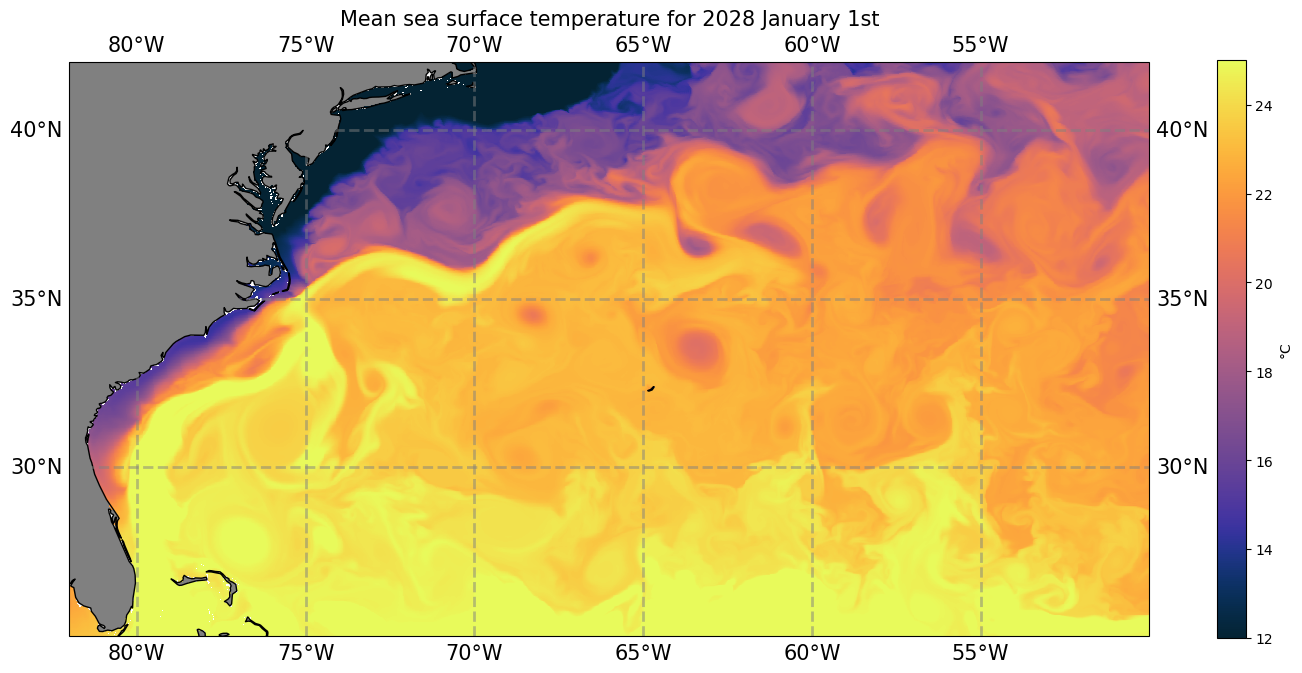

In [7]:
pf.map_mean_GS_ORCA36(dsGS.tos.mean(dim='time_counter'),dsGS.nav_lon,dsGS.nav_lat,'Mean sea surface temperature for 2028 January 1st', '°C', 12, 25, cmocean.cm.thermal,"ORCA36_SST_GS_20180101.png")


